A churn predictor for a bank is developed using Artificial Neural Network architecture.
Churn rate measures the number of customers or employees who leave the bank during a given period

Importing necessary packages and dataset

In [1]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
av                            10.0.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
b

In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [1]:
# Import basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('dataset_churn_modelling.csv')

Exploratory Data Analysis

In [3]:
dataset.shape

(10000, 14)

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset looks to be a binary classification dataset with 14 features.
- Bank dataset
- Dependent feature provides if the customer quits or exits the services 

In [5]:
# Divide the dataset into independent (X) and dependent (y) features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
# Feature Engineering, where the categorical features (geography and gender) will be taken care of
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


The geography feature with three categories got 'one-hot' encoded

In [10]:
pd.get_dummies(X['Geography'], drop_first=True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
geography = pd.get_dummies(X['Geography'], drop_first=True)

In [12]:
pd.get_dummies(X['Gender'])

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


Gender feature with two categories got 'one-hot' encoded

In [13]:
pd.get_dummies(X['Gender'], drop_first=True)

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [14]:
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [15]:
#Two features are as follows:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [16]:
# First, drop and then concatenate these variables with dataframe
# axis=1 denotes 'the drop of two features from the column' but not from row 
X.drop(['Geography', 'Gender'], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [17]:
# updating the independent feature of dataset (X)
X=X.drop(['Geography', 'Gender'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
# Concatenate
pd.concat([X, geography, gender], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


Thus, the categorical features are handled by using 'one-hot' encoding and concatinating the features

In [19]:
# Update the data in variable X
X = pd.concat([X, geography, gender], axis=1)

In [20]:
# Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# Feature scaling, which is used to solve distance-based and gradient descent-based problems
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
X_train.shape

(8000, 11)

In [25]:
X_test.shape

(2000, 11)

After EDA and FE, now creating the ANN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [84]:
# Initializing ANN
classifier = Sequential()

In [85]:
# Adding input layer
classifier.add(Dense(units=11, activation='relu'))

In [86]:
# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.1))

In [87]:
# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.1))

In [88]:
# Adding the output layer, one neuron (unit) as it is a binary classification problem
classifier.add(Dense(1, activation='sigmoid'))

The classifier neural network is ready.

In [89]:
# First, using the optimizer
# Then, training the neural network, 
# Adam optimizer uses the learning rate by default as 0.01, we can customize this as follows
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

In [90]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [91]:
# Insteading of using Adam, opt can be used in the previous cell
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Accuracy'])

Training the model

In [92]:
# Early Stopping : https://keras.io/api/callbacks/early_stopping/
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [93]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4496 - Accuracy: 0.8085 - val_loss: 0.4046 - val_Accuracy: 0.8364
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3898 - Accuracy: 0.8386 - val_loss: 0.3766 - val_Accuracy: 0.8444
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3669 - Accuracy: 0.8494 - val_loss: 0.3869 - val_Accuracy: 0.8448
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3620 - Accuracy: 0.8520 - val_loss: 0.3670 - val_Accuracy: 0.8523
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3614 - Accuracy: 0.8563 - val_loss: 0.3661 - val_Accuracy: 0.8508
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3578 - Accuracy: 0.8550 - val_loss: 0.3667 - val_Accuracy: 0.8557
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3556 - Accuracy: 0.8546 - val_loss: 0.3872 - val_Accuracy:

After 402nd epoch, the accuracy keeps rotating but not increasing anymore. Hence, an early stopping was required. At 425th epoch, I am stopping the training and using an Early Stopping function that stops training when the monitored metric stopped improving.
- After using Early Stopping, it stops at 48th epoch

In [94]:
model_history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

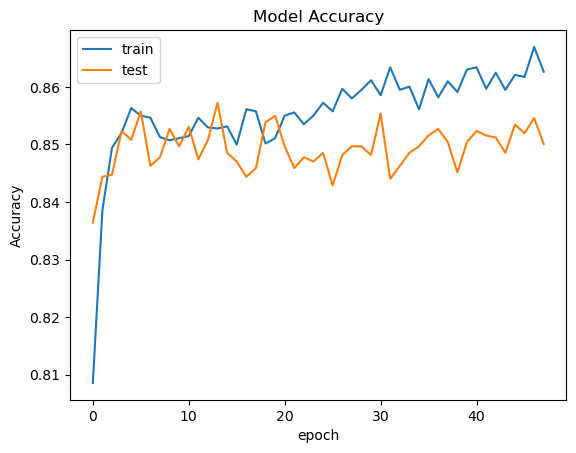

In [95]:
# Visualize the history for accuracy
plt.plot(model_history.history['Accuracy'])
plt.plot(model_history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

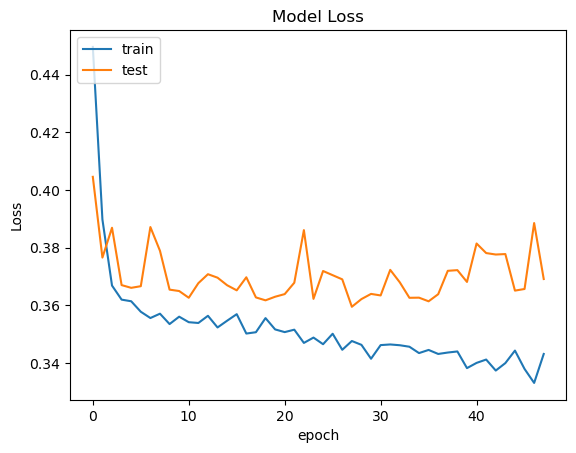

In [96]:
# Visualize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Prediction for test data and evaluation of the model

In [97]:
# Predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.50)

63/63 [==============================] - 0s 3ms/step


In [98]:
# Making of the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1531,   64],
       [ 219,  186]], dtype=int64)

In [107]:
# Calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8585

In [106]:
# Saving the model
from tensorflow.keras.models import load_model
classifier.save('churn_predictor.h5')

Done, we find quite a good accuracy of 85.85%

Developed by: Navid Bin Ahmed, 2-Feb 2023, 11:42 AM